# Getting Madpy event data from the Meetup.com API

Connecting to the Meetup.com API requires a API key, which you can get here: [secure.meetup.com/meetup_api/key/](https://secure.meetup.com/meetup_api/key/).

I decided to store the API key in an environment variable, `MEETUP_API_KEY`.

Then you can install the `meetup` python package that contains wrappers to the API: `pip install meetup-api`

In [1]:
import os
import meetup.api

key = os.environ['MEETUP_API_KEY']
client = meetup.api.Client(key)

## Getting Madpy events

First I get the Madpy group by searching using the `urlname` for the group.
T

In [2]:
import pandas

group = client.GetGroup({'urlname': 'MadPython'})
events = client.GetEvents({'group_id': group.id, 'status': 'past'})
data = pandas.DataFrame.from_records(events.results)
data

29/30 (10 seconds remaining)
28/30 (10 seconds remaining)


,announced,created,description,duration,event_url,group,headcount,how_to_find_us,id,maybe_rsvp_count,...,rating,rsvp_limit,status,time,updated,utc_offset,venue,visibility,waitlist_count,yes_rsvp_count
0,True,1488943873000,<p>For our first meeting we will make some int...,7200000.0,https://www.meetup.com/MadPython/events/238257...,"{'join_mode': 'open', 'created': 1481930276000...",0,Room 301,238257445,0,...,"{'count': 11, 'average': 4.360000133514404}",NaN,past,1491951600000,1493136625000,-18000000,"{'zip': '53703', 'country': 'us', 'localized_c...",public,0,64
1,True,1492018127000,<p>Graph-based representations of data (think ...,NaN,https://www.meetup.com/MadPython/events/239161...,"{'join_mode': 'open', 'created': 1481930276000...",0,NaN,239161489,0,...,"{'count': 2, 'average': 4.5}",NaN,past,1494543600000,1494598792000,-18000000,"{'zip': '53703', 'country': 'us', 'localized_c...",public,0,58
2,True,1495104364000,<p>Change of plans! Michael is going to presen...,4500000.0,https://www.meetup.com/MadPython/events/240080...,"{'join_mode': 'open', 'created': 1481930276000...",0,Room 301,240080727,0,...,"{'count': 1, 'average': 3}",NaN,past,1496962800000,1496975773000,-18000000,"{'zip': '53703', 'country': 'us', 'localized_c...",public,0,46
3,True,1497403844000,<p>This month we'll be talking about developer...,4500000.0,https://www.meetup.com/MadPython/events/240774...,"{'join_mode': 'open', 'created': 1481930276000...",0,Room 301,240774417,0,...,"{'count': 3, 'average': 3.3299999237060547}",NaN,past,1499986800000,1500171109000,-18000000,"{'zip': '53703', 'country': 'us', 'localized_c...",public,0,55
4,True,1500549588000,<p>For our next meeting I will be giving a qui...,5400000.0,https://www.meetup.com/MadPython/events/241873...,"{'join_mode': 'open', 'created': 1481930276000...",0,Room 301,241873343,0,...,"{'count': 0, 'average': 0}",NaN,past,1502406000000,1502413866000,-18000000,"{'zip': '53703', 'country': 'us', 'localized_c...",public,0,38
5,True,1502193325000,"<p>As a part of Forward Fest ($), I am organiz...",28800000.0,https://www.meetup.com/MadPython/events/242378...,"{'join_mode': 'open', 'created': 1481930276000...",0,NaN,242378108,0,...,"{'count': 0, 'average': 0}",NaN,past,1503408600000,1503440575000,-18000000,"{'country': 'US', 'localized_country_name': 'U...",public,0,5
6,True,1504138441000,"<p>I will go over the basics of Airflow, a tas...",5400000.0,https://www.meetup.com/MadPython/events/242969...,"{'join_mode': 'open', 'created': 1481930276000...",0,Room 301,242969446,0,...,"{'count': 0, 'average': 0}",NaN,past,1506034800000,1506043547000,-18000000,"{'zip': '53703', 'country': 'us', 'localized_c...",public,0,41
7,True,1507039215000,<p>This month Scott Sievert will be presenting...,5400000.0,https://www.meetup.com/MadPython/events/243882...,"{'join_mode': 'open', 'created': 1481930276000...",0,Room 301,243882578,0,...,"{'count': 1, 'average': 5}",NaN,past,1508454000000,1508464334000,-18000000,"{'zip': '53703', 'country': 'us', 'localized_c...",public,0,29
8,True,1509592138000,"<p>For this meeting, we will be covering Ansib...",5400000.0,https://www.meetup.com/MadPython/events/244740...,"{'join_mode': 'open', 'created': 1481930276000...",0,Room 301,244740483,0,...,"{'count': 1, 'average': 5}",NaN,past,1510272000000,1510287377000,-21600000,"{'zip': '53703', 'country': 'us', 'localized_c...",public,0,25
9,True,1510760643000,"<p>This month Dan will be showing off pytest, ...",5400000.0,https://www.meetup.com/MadPython/events/245133...,"{'join_mode': 'open', 'created': 1481930276000...",18,Room 301,245133378,0,...,"{'count': 1, 'average': 5}",NaN,past,1513296000000,1518176870000,-21600000,"{'country': 'us', 'localized_country_name': 'U...",public,0,25


## RSVP counts

In [3]:
# Move event name to index
data.set_index('name', inplace=True)

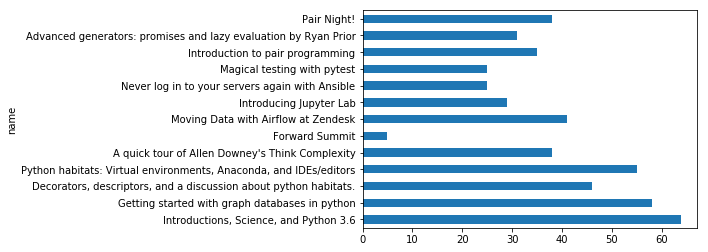

In [4]:
%matplotlib inline
data.yes_rsvp_count.plot.barh()